# Data Loading

In [ ]:
import pandas as pd

# Load Titanic dataset directly from the internet
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

print(data.head())      # show first rows
print(data.shape)       # (rows, columns)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

# Quick EDA (plots)

Survival rate: 0.3838383838383838


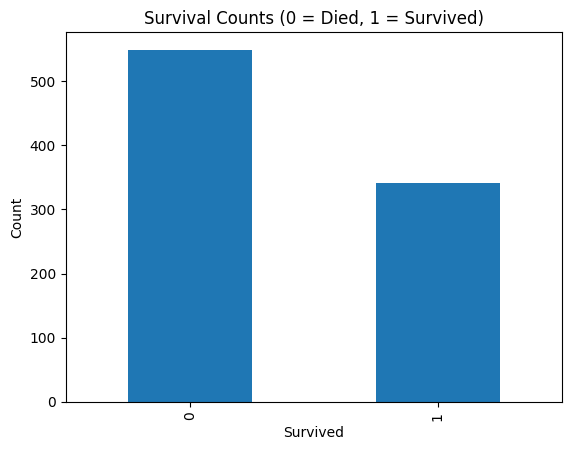

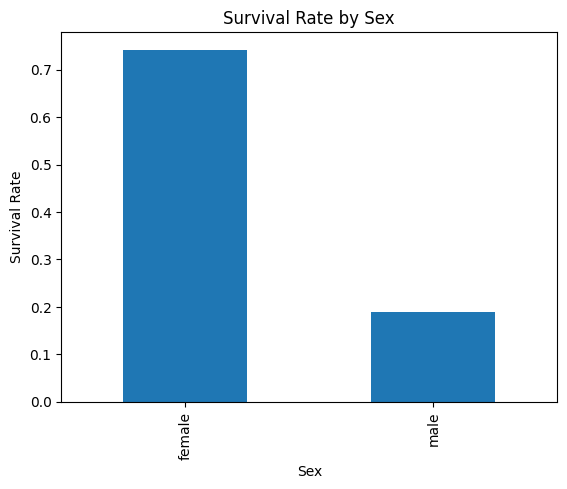

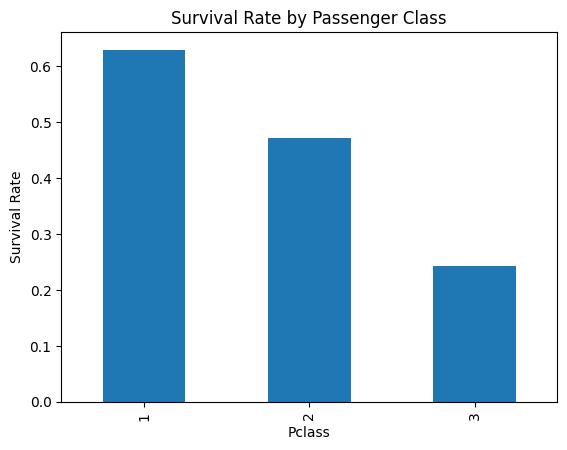

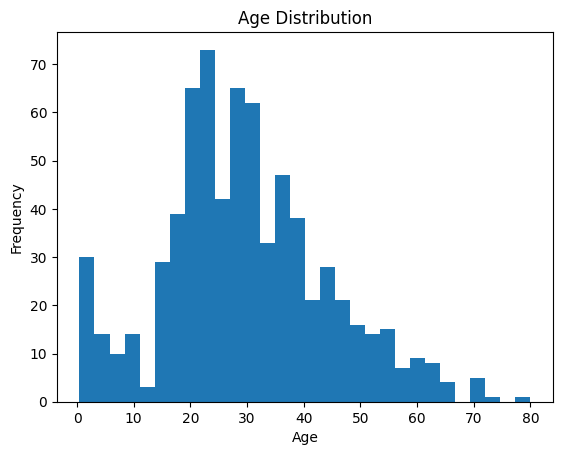

In [ ]:
import matplotlib.pyplot as plt

# Survival rate
survival_rate = data["Survived"].mean()
print("Survival rate:", survival_rate)

# Survival count bar chart
data["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Counts (0 = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Survival by Sex
data.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

# Survival by Passenger Class
data.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# Age distribution
data["Age"].dropna().plot(kind="hist", bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Preprocessing

In [ ]:
# Select useful columns
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X = data[features].copy()
y = data["Survived"]

# Handle missing values
X["Age"] = X["Age"].fillna(X["Age"].median())

# Convert Sex to numbers
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})


# Model training (baseline + improved)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model 1: Logistic Regression (simple baseline)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_lr = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

# Model 2: Random Forest (stronger)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


Logistic Regression Accuracy: 0.8100558659217877
[[92 13]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Accuracy: 0.8044692737430168
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



**Compared Logistic Regression and Random Forest. Logistic Regression achieved 81% accuracy and better recall-precision tradeoff, likely due to dataset size and linear feature relationships.**

# Feature importance

  feature  importance
5    Fare    0.300568
1     Sex    0.273294
2     Age    0.256716
0  Pclass    0.081660
3   SibSp    0.050145
4   Parch    0.037616


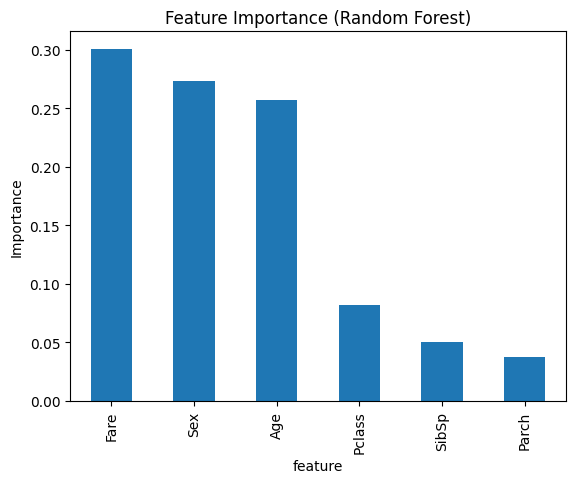

In [ ]:
importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

print(importance)

importance.plot(kind="bar", x="feature", y="importance", legend=False)
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.show()

